# Chapter 10

## Grover Aqua


Ch 11: Grover search with Aqua
------------------------------
Enter the oracle input string, such as:~A & ~B & C
or enter 'def' for a default string.
Iterations:  2
Oracle method: log
Oracle for: ~A & ~B & C


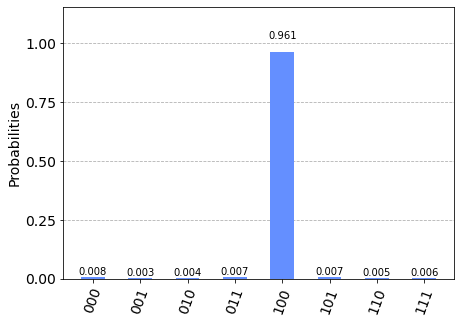

Backend: qasm_simulator
Result: 100
Getting provider...


KeyboardInterrupt: ignored

In [12]:
from qiskit import Aer, IBMQ

# Do the necessary import for our program

from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.circuit.library import PhaseOracle

# Import basic plot tools
from qiskit.tools.visualization import plot_histogram

from IPython.core.display import display

global oracle_method, oracle_type


def log_length(oracle_input):
    from math import sqrt, pow, pi
    filtered = [c.lower() for c in oracle_input if c.isalpha()]
    result = len(filtered)
    num_iterations=int(pi/4*(sqrt(pow(2,result))))
    return num_iterations

def create_oracle(oracle_method):
    oracle_text={"log":"~A & ~B & C"}
    # set the input
    global num_iterations    
    print("Enter the oracle input string, such as:"+oracle_text[oracle_method]+"\nor enter 'def' for a default string.")
    oracle_input=input('\nOracle input:\n ')
    if oracle_input=="def":
        oracle_type=oracle_text[oracle_method]
    else:
        oracle_type = oracle_input
    num_iterations=log_length(oracle_type)
    print("Iterations: ", num_iterations)
    return(oracle_type)

def run_grover(oracle_type, oracle_method, backend):
    # Create and run the oracle on the selected backen
    oracle = PhaseOracle(oracle_type)
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
    algorithm = Grover(iterations=num_iterations, quantum_instance=QuantumInstance(backend, shots=1024))
    # Display the results
    result = algorithm.amplify(problem)
    display(plot_histogram(result.circuit_results[0]))
    print("Backend:",backend.name()+"\nResult:",result.top_measurement)
    

# Main loop
def main():
    # set the oracle method: "Log" for logical expression  
    oracle_method="log"
    while oracle_method!=0:
        print("Ch 11: Grover search with Aqua")
        print("------------------------------")    
        # Set the oracle type
        oracle_type=create_oracle(oracle_method)

        print("Oracle method:",oracle_method)
        print("Oracle for:", oracle_type)
        # Run on a simulator
        backend = Aer.get_backend('qasm_simulator')
        run_grover(oracle_type, oracle_method, backend)
        # Run the algorithm on an IBM Quantum backend
        print("Getting provider...")
        if not IBMQ.active_account():
            IBMQ.load_account()
        provider = IBMQ.get_provider()
        from qiskit.providers.ibmq import least_busy
        backend = least_busy(provider.backends(n_qubits=5, operational=True, simulator=False))
        run_grover(oracle_type, oracle_method, backend)
    
if __name__ == '__main__':
    main()

## SHOR Aqua

In [13]:
from qiskit import Aer, IBMQ
from qiskit.algorithms import Shor
from qiskit.utils import QuantumInstance
import time
global backend, shots

def display_shor(N, backend, shots):
    print("Building Shor circuit...")
    instance = QuantumInstance(backend=backend, shots=shots)
    shors = Shor(quantum_instance = instance)
    shor_circuit = shors.construct_circuit(N)
    print("Shor circuit for: ",str(N) )
    print(shor_circuit)
    print("Decomposed Shor circuit for: ",str(N) )
    print(shor_circuit.decompose())
    print("Circuit data\n\nDepth: ",shor_circuit.depth(),"\nWidth: ",shor_circuit.width(),"\nSize: ",shor_circuit.size())

def run_shor(N, backend, shots):
    print("Running Shor's algorithm for",str(N),"on", backend,"...")
    instance = QuantumInstance(backend=backend, shots=shots)
    shors = Shor(quantum_instance = instance)
    results=shors.factor(N)

    if results.factors==[]:
        print("No prime factors: ",str(N),"=",str(N))
    elif isinstance(results.factors[0],int):
        print("Prime factors: ",str(N),"=",results.factors[0],"^ 2")
    else:
        print("Prime factors: ",str(N),"=",results.factors[0][0],"*",results.factors[0][1])
def main():
    number=1
    print("\nCh 11: Shor's algorithm with Aqua")     
    print("---------------------------------")   
    while number!=0:
        number=int(input("\nEnter an odd number N >1 (0 to exit):\n"))
        if number<=64: #Arbitrarily set upper limit for local simulator    
            print("Getting local simulator backend...")
            backend = Aer.get_backend('qasm_simulator')
            shots = 1024
        else:
            print("Getting provider...")
            if not IBMQ.active_account():
                IBMQ.load_account()
            provider = IBMQ.get_provider()
            print("Getting IBM Q simulator backend...")
            backend = provider.get_backend('ibmq_qasm_simulator')
        if number>1 and number % 2>0:
            type=input("Enter R to run the Shor algorithm, D to display the circuit.\n")
            start_time=time.time()
            if type.upper()=="D":
                display_shor(number, backend, shots)
            elif type.upper()=="R":
                run_shor(number, backend, shots)
            elif type.upper() in ["RD","DR"]:
                display_shor(number, backend, shots)
                run_shor(number, backend, shots)
            end_time=time.time()
            print("Elapsed time: ","%.2f" % (end_time-start_time), "s")
        else:
            print("The number must be odd and larger than 1.")

if __name__ == '__main__':
    main()


Ch 11: Shor's algorithm with Aqua
---------------------------------

Enter an odd number N >1 (0 to exit):
5
Getting local simulator backend...
Enter R to run the Shor algorithm, D to display the circuit.
D
Building Shor circuit...
Shor circuit for:  5
        ┌───┐┌─────────────┐┌───────┐
  up_0: ┤ H ├┤0            ├┤0      ├
        ├───┤│             ││       │
  up_1: ┤ H ├┤1            ├┤1      ├
        ├───┤│             ││       │
  up_2: ┤ H ├┤2            ├┤2      ├
        ├───┤│             ││  IQFT │
  up_3: ┤ H ├┤3            ├┤3      ├
        ├───┤│             ││       │
  up_4: ┤ H ├┤4            ├┤4      ├
        ├───┤│             ││       │
  up_5: ┤ H ├┤5            ├┤5      ├
        ├───┤│             │└───────┘
down_0: ┤ X ├┤6            ├─────────
        └───┘│   2^x mod 5 │         
down_1: ─────┤7            ├─────────
             │             │         
down_2: ─────┤8            ├─────────
             │             │         
 aux_0: ─────┤9         